# Machine Learning w/Python 3.7

## Importing Python Packages / Modules

# Introduction to Machine Learning with scikit-learn

### Erin E. McCabe

Welcome! In this workshop, we are going to learn how to go through the process of doing machine learning on a set of data. To do so, we will download a corpus of text data to work with, extract features from this data, and do supervised machine learning to our data, using a mathmatical algorithm to train a classifier which will then classify previously unseen data into a set of predefined categories.

"Machine learning is a research field that sits at the intersections of statistics, artificial intelligence, and computer science. It is also known as predictive analystics or statistical learning."

-- Andreas Mueller, "Introduction to Machine Learning with Python".

## Learning objectives

In this workshop, you will learn the following skills:

* How to use skills from the NLTK workshop to build features for a classification task
* How to build a text classification system that can predict whether sentences belong to one category or another ("news" or "romance")
* How to group data and perform calculations on the aggregations
* How to prepare data for machine learning using pandas, a package for Python that helps to organize your data
* How to use the scikit-learn package for Python to perform different types of machine learning on the data
* How to evaluate the results of machine learning algorithms
* How to visualize obeservations, aggregations, and algorithmic results


## Key terms

**machine learning**: An application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed

**corpus**: A large collection of data. In our case, this will be text data (although a corpus can contain any type of data)

**dataset**: collection of related information (such as a corpus)

**variable**: attribute of the dataset (such as the type of text being analyzed)

**observation**: entry in the dataset (a single text)

**measurement**: single data point (eg: one texts type)

**features**: Properties that describe data attributes for machine learning - often the variables

**feature representation, feature vector**: A set of features

**supervised machine learning**: A machine learning task of learning a function that maps an input to an output based on example input-output pairs

**unsupervised machine learning**: A machine learning task used to draw inferences from datasets consisting of input data without labeled responses (lacks input-output pairs; only has input data)

**algorithm**: A process or set of rules to be followed in calculations (or other problem-solving operations), particularly by a computer

**classification**: An machine learning task used to predict a class label, which is a choice from a predefined list of possibilities

*Sources: Wikipedia, Andreas Mueller's "Introduction to Machine Learning with Python"*

### What do you need for this workshop?
* ~~Python 3 / Jupyter Notebook~~

### Python Packages Overview
* The Natural Language Toolkit (nltk) - we'll be accessing corpora as well as functional tools from this package.
    * The Brown Corpus: A text corpus of American English, split into fifteen different categories
    * Part of Speech Taggers (pos): prebuilt functions that are designed to determine the part of speech of every word in a given sentence.
* pandas - for data processing    
* matplotlib - for visualizing data (%matplotlib inline - displays images clearly in the Jupyter notebook)
* scikit-learn - for machine learning (ft. various classification, regression and clustering algorithms)

In [7]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

ModuleNotFoundError: No module named 'nltk'

## Understanding Classification

#### How would you describe apples to a computer? How do they differ from oranges?
Remember, computers can only really understand numbers, true false values, and strings within a predefined set

_Source: Andrew Rosenberg_

Our fruit test shows us everything we need to do a classification machine learning test. For each item with a label (apple, orange, lemon), we use a series of values to try to capture machine-understandable information about the item. These values are a feature representation of the item in question. The features themselves, as we can see above, can be numeric, true/false values, or a string in a set of predefined strings.

#### What if we had a new, unknown fruit?

_Source: Andrew Rosenberg_

This fruit test is an example of a classification task. Classification allows you to predict a categorical value. This is a type of supervised machine learning, meaning we know the labels ahead of time and can give them to the machine learning algorithm so that it can be trained to knows what the categories of our data are. This way, when it comes time to give the previously algorithm previously unseen data, it knows which categories it's looking for.

#### Let's get to coding!

In this workshop we are going to classify two different sets of sentences from very different source material in the Brown corpus; one set of sentences from a corpus of news text, and the other set of sentences from a corpus of romance novel text.

## Accessing our Data

In [6]:
from nltk.corpus import brown

ModuleNotFoundError: No module named 'nltk'

In [5]:
for cat in brown.categories():
    print (cat)

NameError: name 'brown' is not defined

### Get the sentences from each corpus

In [ ]:
news_sent = brown.sents(categories=["news"])
romance_sent = brown.sents(categories=["romance"])

### Practice 1: Look at the first 5 sentences of each corpus

In [ ]:
print (news_sent[:5])
print ()
print (romance_sent[:5])

#### What do you notice about the format of the data above?

Each sentence is already _tokenized_ split into a series of word and punctuation strings, with whitespace removed. This saves a lot of time having to do this work ourselves, manually. 

### Using Data Structures to Manage Data

To start to organize our data, let's put these sentences into a pandas DataFrame, an object which has a format very similar to an Excel spreadsheet. We will first make two spreadsheets (one for news, and one for romance), and then combine them into one. We will also add the category each sentences came from, which will be our labels for each sentence and its associated feature representation (which we will build ourselves).

In [ ]:
ndf = pd.DataFrame({'sentence': news_sent,
                    'label':'news'})
rdf = pd.DataFrame({'sentence':romance_sent, 
                    'label':'romance'})

In [ ]:
# combining two spreadsheets into 1
df = pd.concat([ndf, rdf])

Let's see what this DataFrame looks like

In [ ]:
df

In [ ]:
df.head()

### So how many texts are there of each type?

In [ ]:
df['label'].value_counts()

### What if we want to visualize that information?

We first create a figure and axes on which to draw our charts using plt.subplots(). Each chart is one axes, and a figure can contain multiple charts. Our data is encapsulated in df['label'].value_counts(), which is itself a dataframe. We then tell the Pandas to visualize the dataframe as a bar chart using .plot.bar(ax=ax, rot=0). The ax keyword tells Pandas which chart in the figure to plot, and the rot keyword controls the rotation of the x axis labels.

In [ ]:
fig, ax = plt.subplots()
_ = df['label'].value_counts().plot.bar(ax=ax, rot=0)
fig.savefig("../images/categories_counts.png", bbox_inches = 'tight', pad_inches = 0)

We have slightly more news texts that romance texts, which we should keep in mind as we go ahead with classification.

### What should we use as features for the datset? What did we use for the fruit example before?

### Now that we are using sentences, how can we best repersent each sentence as a series of values?

One idea is to use how many particular parts of speech the sentence contains.

* Nouns: Most basically described as a person, place, or thing. Counting nouns can help determine how many topics are being discussed in a sentence.
* Adjectives: Descriptors of nouns (eg. "yellow", "angry", "charming"). Counting adjectives can help determine how often descriptive words are being added to nouns, which can demonstrate writing style.
* Adverbs: Descriptors of verbs (eg. "quickly", "hungrily", "annoyingly"). Counting adverbs can help determine how often the manner of the verb is modified, which can also demonstrate writing style.

#### Why might we want to use these parts of speech to distinguish between news sentences and romance sentences?
We will now compute all of the parts of speech on each sentence (row) in our dataframe.

### Practice 2: Get the part of speech tags for each sentence in the dataframe
Hint: df['sentence']

In [ ]:
# compute parts of speech on each sentence (row)
pos_all = pos_tag_sents(df['sentence'])
print (pos_all[:5])

### What's with those part of speech labels? They aren't helpful at all!

The Penn Tagset, which NLTK uses for it's part of speech tagger, is not particularly intuitive. Fortunately, they provide code that allows you to check what different tags stand for.

In [ ]:
# troubleshooting: https://github.com/nltk/nltk/issues/919
nltk.help.upenn_tagset("NN")
nltk.help.upenn_tagset("JJ")

### Write a function that calculates our features for us
#### (In this case, numbers of nouns, adjectives, and adverbs that appear in the sentence)

Now we know the tags for the different parts of speech we want to count in each sentence. Let's now write a function that will count the parts of speech to us, when given a part of speech tagged sentence (such as we have already in our DataFrame) and the part of speech we want to count (for example, "NN" to count the number of nouns in the sentence).

In [ ]:
def countPOS(pos_tag_sent, POS):
    pos_count = 0
    all_pos_counts = []
    for sentence in pos_tag_sent:
        for word in sentence:
            tag = word[1]
            if tag [:2] == POS:  
                pos_count = pos_count+1
        all_pos_counts.append(pos_count)
        pos_count = 0
    return all_pos_counts

We will now call this function twice, one for each of the parts of speech we are counting. As we finish counting them, we put the results into the DataFrame, saving us the trouble of having to do so late

In [ ]:
df['NN'] = countPOS(pos_all, 'NN')
df['JJ'] = countPOS(pos_all, "JJ")

In [ ]:
df.head()

In [ ]:
df.tail()

### So how many POS types do we have for each type of text?

We can use the Pandas groupby function to aggregate our data based on unique values in any column of the data. Here we seperate our data into groups by the label type (news or romance) and then add together each texts count of nouns, adjectives, and adverbs.

In [ ]:
df.groupby('label').sum()

### Practice 3: Save the dataframe to your computer as a csv file (comma separated value)
Hint: .to_csv()

### Let's visualize this data!

What do you notice about the data? Do you think our features will be good at predicting news and romance sentences? Which features do you think will be the most useful? We will be using the matplotlib and pandas libraries to visualize our data, and the latter is built on the former. As mentioned above, a matplotlib visualization is a figure onto which is attached one or more axes. Each axes has a horizontal (x) axis and vertical (y) axis, and the data is encoded using color and glyphs such as markers (for example circles) or lines or polygons (called patches). The figure below annotates these parts of a visualization and was created by Nicolas P. Rougier using matplotlib. The source code can be found in the matplotlib documentation. 1

#### How do we visualize the POS types table?

We can directly plot any dataframe in pandas using the .plot method, and can do .plot.<type> to denote the type of chart we want to plot. This situation calls for a bar chart because there are two classes of discrete sums of counts. To explore a different grouping, the table can be rotated using .T (transpose).

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,  figsize=(15,5))
_ = df.groupby('label').sum().plot.bar(ax=ax1, rot=0, color=['blue', 'red'])
_ = df.groupby('label').sum().T.plot.bar(ax=ax2, color=['tab:blue','tab:orange'], rot=0)

fig.savefig("../images/part_of_speech.png", bbox_inches = 'tight', pad_inches = 0)

#### Are there patterns in the individual observations?

We can make a scatter plot of our data colored by label to see if the patterns observed in the aggregate are visible in the individual observations.

In [ ]:
# seperate our data into the two classes
news = df[df['label']=='news']
romance = df[df['label']=='romance']

fig, ax = plt.subplots(figsize=(15,10))
_ = ax.scatter(news['NN'], news['JJ'], label="news", alpha=.25, edgecolor='k')
_ = ax.scatter(romance['NN'], romance['JJ'], label="romance", alpha=.25, edgecolor='k')
_ = ax.legend(fontsize=14)
_ = ax.set_xlabel("nouns", fontsize=14)
_ = ax.set_ylabel("adjectives", fontsize=14)
_ = ax.set_aspect("equal")
fig.savefig("../images/news_scatter.png", bbox_inches = 'tight', pad_inches = 0)

In [ ]:
# Let's flip the order
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.scatter(romance['NN'], romance['JJ'], label="romance", color='tab:orange', alpha=.5, edgecolor='k')
_ = ax.scatter(news['NN'], news['JJ'], label="news", color='tab:blue', alpha=.5, edgecolor='k')
_ = ax.legend(fontsize=14)
_ = ax.set_xlabel("nouns", fontsize=14)
_ = ax.set_ylabel("adjectives", fontsize=14)
_ = ax.set_aspect("equal")
fig.savefig("../images/romance_scatter.png", bbox_inches = 'tight', pad_inches = 0)

#### How do we visual dense highly overlapping data?

As seen above, when the data is very dense the points can sometimes overlap. One way to visualize this overlapping data is to shift each point by a tiny amount so that the data is no longer at exactly the same coordinate. This technique is called jittering. In the jitter function below, we compute a scale factor by which to multiply random numbers between 0 and 1 so that the jitter is large enough to effect the visualization.

In [ ]:
np.random.seed(42)

def jitter(arr):
    scale = .01*(arr.min() - arr.max())
    return arr + np.random.randn(arr.shape[0]) * scale

fig, ax = plt.subplots(figsize=(15,10))

_ = ax.scatter(jitter(news['NN']), jitter(news['JJ']), label="news", alpha=.25, edgecolor='k')
_ = ax.scatter(jitter(romance['NN']), jitter(romance['JJ']), label="romance", alpha=.25, edgecolor='k')
_ = ax.legend(fontsize=14)
_ = ax.set_xlabel("nouns", fontsize=14)
_ = ax.set_ylabel("adjectives", fontsize=14)
_ = ax.set_aspect("equal")
fig.savefig("../images/jitter.png", bbox_inches = 'tight', pad_inches = 0)

### Visualize Side By Side

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3), gridspec_kw={'width_ratios':[1,5]})

_ = df.groupby('label').sum().T.plot.bar(ax=ax1, color=['tab:blue','tab:orange'], rot=0, 
                                         fontsize=14)
ax1.set_ylabel("Total Count of POS")

_ = ax2.scatter(jitter(news['NN']), jitter(news['JJ']), label="news", alpha=.25, edgecolor='k')
_ = ax2.scatter(jitter(romance['NN']), jitter(romance['JJ']), label="romance", alpha=.25, edgecolor='k')
_ = ax2.legend(fontsize=14)
_ = ax2.set_xlabel("nouns", fontsize=14)
_ = ax2.set_ylabel("adjectives", fontsize=14)
_ = ax2.set_aspect('equal')
fig.savefig("../images/side_by_side.png", bbox_inches = 'tight', pad_inches = 0)

In [ ]:
df.to_csv("df_news_romance.csv", index=False)

## Extracting Features from our Data

## Supervised Machine Learning

Supervised machine learning takes places in two steps: the training phase, and the testing phase. In the training phase, you use a portion of your data to train your algorithm (which, in our case, is a classification algorithm). You provide both your feature vector and your labels to the algorithm, and the algorithm searches for patterns in your data that can help associate it with a particular label.

In the testing phase, we use the classifier we trained in the previous step, and give it previously unseen feature vectors representing unseen data to the algorithm, and have the algorithm predict the label. We can then compare the "true" label to the predicted label, and see if our classifier provides us with a good and generalizable way of accomplishing the task (in our case, the task of automatically distinguishing news sentences from romance sentences).

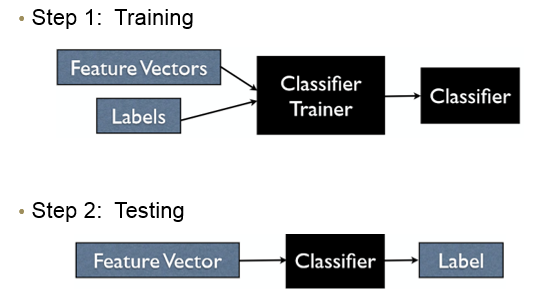

In [4]:
from IPython.display import Image
Image(filename="mlsteps.png")

Source: Andrew Rosenberg

It's important to remember that we cannot use the same data we used to build the classifier to test the data; if we did, our classifier would be 100% correct all of the time! This will not tell us how our trained classifer will perform on new, unseen data. We therefore need to split our data into a train set and a test set.

* We will use the train set data to train our classifier
* We will use the test set data to test our classifier

First, we need to load in the Python libraries that we will be using for our analysis.

## Unsupervised Machine Learning

In supervised machine learning tasks, the data is assigned to some set of classes. For example, here we are given a dataset wherein each observation is a set of physical attributes of an object. In an supervised task, the object column acts as the labels. The algorithm then uses these existing separations in the data to develop criteria for classifying unknown observations in the data.

## Topic Modeling with Latent Dirchlet Allocation (LDA)

One subset of unsupervised learning tasks are topic extraction tasks, where the aim is to find common groupings of items across collections of items. One method of doing so is Latent Dirichlet allocation (LDA). Latent Dirichlet Allocation is a way to model how topics are distributed over a corpus and words are distributed over a set of topics.

In broad strokes, LDA extracts hidden (latent) topics via the following steps:1, 2

1. Arbitrarily decide that there are 10 topics.
2. Select one document and randomly assign each word in the document to one of the 10 topics.
3. Repeat step 2 for all the other documents. This results in the same word being assigned to multiple topics.
4. Compute
    * how many topics are in each document?
    * how many topic assignements are due to a given word?
5. Take one word in one document and reassign it to a new topic and then repeat step 4.
6. Repeat step 5 until the model stabilizes such that reassigned topics do not change distributions.

LDA yields a set of words associated to each topic (see step 4, part 2) and the mixture of topics associated to each document (see step 4, part 1).

# Let's do topic modeling with sklearn!

One of the best things about sklearn is the simplicity of its syntax.

To do machine learning with sklearn, follow these five steps (the function names remain the same, regardless of the algorithm you use!):

### Step 1: Import your desired algorithm

In this example, we will be using the Latent Dirichlet Allocation algorithm.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

### Step 2: Choose your machine learning algorithm

When creating an instance of sklearn's LatentDirichletAllocation algorithm to run on our data, we need to set parameters. n_components is the number of topics in the dataset and we set random_state to 42 so that this notebook is reproducible. Since the sentences happen to already have labels (either news or romance), lets see if LDA can also find those separations by setting the number of topics to 2.

In [ ]:
num_topics = 2
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

### Step 3: Fit your data

Using the lda object we set up above, we now apply (fit) the LDA algorithm to the bag of words we extracted from our sentences and had stored in the tf sparse matrix.

In [ ]:
lda.fit(tf)

In [ ]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=2, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

### Step 4: Transform your data

We now want to model the documents in our corpus in terms of the topics discovered by the model. This is done using the .transform method of LDA. This function yields the distribution of topics across the documents. The document_topic array contains the percentages of each topic found in each document.

In [ ]:
document_topic = lda.transform(tf)

Then we visualize how much of each document is each topic - for example that document 1 is 10% topic A and 25% topic b. We choose an area chart because each band of the chart maps to a different category (in this case a unique topic). The width of each band in relation to the others illustrates how much of the document is thought to be about that topic relative to the others.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

colors = ['tab:green', 'tab:pink']
topics = np.arange(10)
num_docs = document_topic.shape[0]

fig, ax = plt.subplots(figsize=(15,5))
_ = ax.stackplot(range(num_docs), document_topic.T, labels=topics, colors=colors)
_ = ax.set_xlim(0, num_docs)
_ = ax.set_ylim(0,1)
_ = ax.set_yticks([])
_ = ax.set_xlabel("document")
_ = ax.legend(title="topic", bbox_to_anchor=(1.06, 1), borderaxespad=0)
fig.savefig("images/doc_topic.png", bbox_inches = 'tight', pad_inches = 0)

### Step 5: Print topics

lda.components_ is an array where each row is a topic, and each column roughly contains the number of times that word was assigned to that topic, which is also the probability of that word being in that topic. To figure out which word is in which column, we use the get_feature_names() function from CountVectorizer. The argsort function is used to return the indexes of the columns with the highest probabilities, which we then map into our collection of words. Here we print the top 5 words in each topic.

In [ ]:
num_words = 10
topic_word  = lda.components_ 
words = np.array(tf_vectorizer.get_feature_names())
for i, topic in enumerate(topic_word):
    # sorting is in descending, so ::-1 reverses to ascending
    sorted_idx = topic.argsort()[::-1]
    print(i, words[sorted_idx][:num_words])

In [ ]:
0 ['said' 'like' 'time' 'just' 'll' 'way' 'didn' 'new' 'president' 'thought']
1 ['mrs' 'said' 'home' 'little' 'year' 'day' 'good' 'new' 'got' 'right']

We can also visualize these topics as lists sized by the frequency of the word and colored by the topic, as proposed by Allan Riddell in Text Analysis with Topic Models for the Humanities and Social Sciences:

In [ ]:
# font size for word with largest share in corpus
fontsize_base = 40/ np.max(topic_word)

fig, ax = plt.subplots(figsize=(15, 2), constrained_layout=True)

for i, topic in enumerate(topic_word):
    top_idx = topic.argsort()[::-1][:num_words]
    top_words = words[top_idx]
    top_share = topic[top_idx]
    for j, (word, share) in enumerate(zip(top_words, top_share)):
        ax.text(j, i/4,  word, fontsize=fontsize_base*share, color=colors[i])
        
#stretch the-axis to accommodate the words
ax.set_xlim(0, num_words)
ax.set_ylim(-.2, i/4+.2)
ax.axis('off')
#fig.subplots_adjust(hspace=-0)
fig.savefig("images/word_topic.png", bbox_inches = 'tight', pad_inches = 0)

## Review

At the end of this workshop, we have covered the following skills:
* How to use skills from the NLTK workshop to build features for a classification task
* How to build a text classification system that can predict whether sentences belong to one category ("news") or another ("romance")
* How to group data and perform calculations on the aggregations
* How to prepare data for machine learning using pandas, a package for Python that helps to organize your data
* How to use the scikit-learn package for Python to perform different types of machine learning on the data
* How to evaluate the results of machine learning algorithms
* How to visualize observations, aggregations, and algorithmic results

## Resources
"Introduction to Machine Learning with Python", Andreas C. Muller and Sarah Guido. O'Reilly, 2017.

"LING 83800: Methods in Computational Linguistics II", Andrew Rosenberg. http://eniac.cs.qc.cuny.edu/andrew/methods2/, 2014.

"Introduction to Latent Dirichlet Allocation", Edward Chen, http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/, 08/22/2011

"Topic Modeling for Humanists: A Guided Tour", Scott Weingart, http://www.scottbot.net/HIAL/index.html@p=19113.html, 07/25/2012

"The LDA Buffet is Now Open", Matthew Jockers, http://www.matthewjockers.net/2011/09/29/the-lda-buffet-is-now-open-or-latent-dirichlet-allocation-for-english-majors/, 09/29/2011

"Introduction to Topic Modeling",Christine Doig, http://chdoig.github.io/pytexas2015-topic-modeling/#/, PyTexas, 2015

##### Acknowledgments
Shout out to the CUNY DHRI for providing much of this workshop's structure.
